# Notebook responsável por gerar as visualizações do tutorial sobre séries temporais

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_airline
from statsmodels.tsa.seasonal import seasonal_decompose

## Geração da visualização dos dados "Box & Jenkins airline data"

In [2]:
y = load_airline()
df = y.to_frame().reset_index()
df

,Period,Number of airline passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [3]:
df.describe()

,Number of airline passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


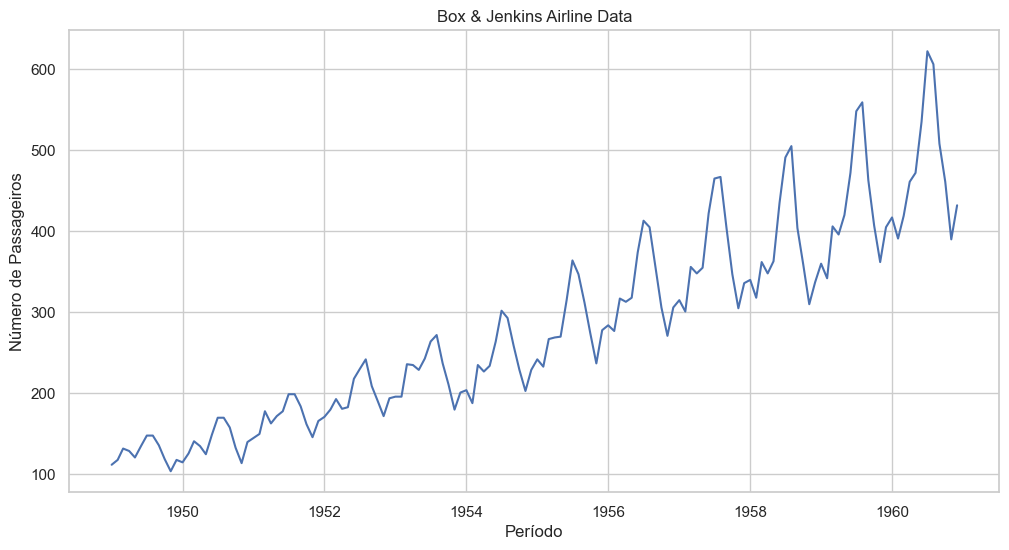

In [4]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Convertendo os períodos para datetime para facilitar a visualização
df['Period'] = df['Period'].dt.to_timestamp()

# Criando a visualização
plt.figure(figsize=(12, 6))
sns.lineplot(x='Period', y='Number of airline passengers', data=df)
plt.title('Box & Jenkins Airline Data')
plt.xlabel('Período')
plt.ylabel('Número de Passageiros')

# Salvando a figura no diretório especificado
plt.savefig('../figs/01 - Box_Jenkins_Airline_Data.png')

# Exibindo o gráfico
plt.show()

## Decomposição da série temporal em 

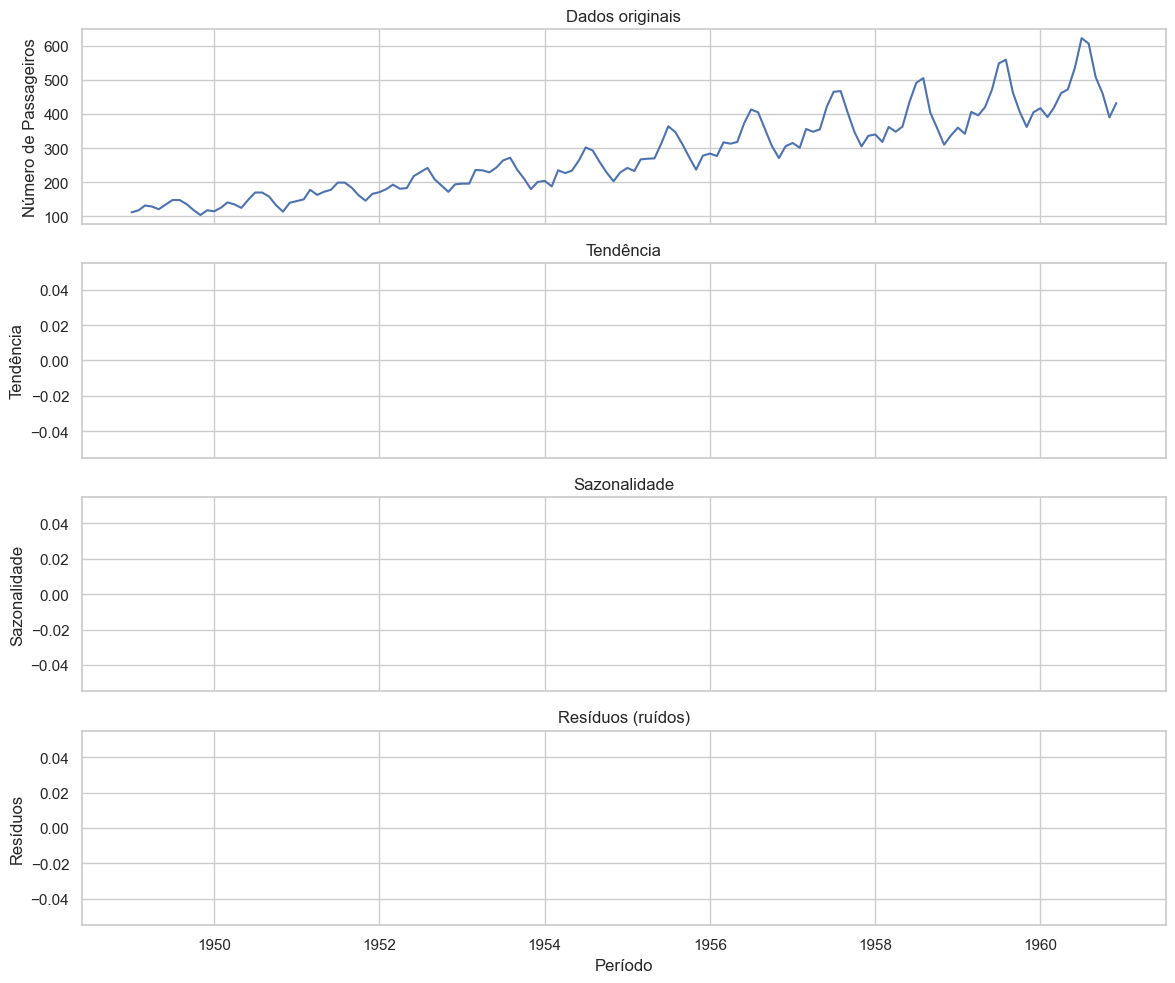

In [5]:
# Garantindo que o índice do DataFrame é a coluna de períodos para que a função seasonal_decompose funcione corretamente
df_dec = df.set_index('Period')

# Decompondo a série temporal
result = seasonal_decompose(df_dec['Number of airline passengers'], model='additive', period=12)
# Decompondo a série temporal
#result = seasonal_decompose(df['Period'], model='additive')

# Plotando os componentes da decomposição
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12, 10))

# Componente original
sns.lineplot(ax=axes[0], x=df['Period'], y=df['Number of airline passengers'])
axes[0].set_ylabel('Número de Passageiros')  # Rótulo para o eixo Y
axes[0].set_title('Dados originais')

# Tendência
sns.lineplot(ax=axes[1], x=df['Period'], y=result.trend)
axes[1].set_title('Tendência')
axes[1].set_ylabel('Tendência')  # Rótulo para o eixo Y

# Sazonalidade
sns.lineplot(ax=axes[2], x=df['Period'], y=result.seasonal)
axes[2].set_title('Sazonalidade')
axes[2].set_ylabel('Sazonalidade')  # Rótulo para o eixo Y

# Resíduo
sns.lineplot(ax=axes[3], x=df['Period'], y=result.resid)
axes[3].set_title('Resíduos (ruídos)')
axes[3].set_ylabel('Resíduos')  # Rótulo para o eixo Y

# Ajustando o layout
plt.xlabel('Período')
plt.tight_layout()
plt.show()
